In [1]:
from __future__ import absolute_import, division, print_function
import glob
import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import pdb
import json
import getpass
from scipy import stats
from sklearn import linear_model
from numpy import linalg as LA
import numpy.random as npr
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.manifold import MDS
from scipy.spatial import distance
from sklearn.cluster import KMeans

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_NET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_NET)
from tools_lnd import make_h_trial_rule, get_model_params, plot_epoch_dynamics_3D
from tools_lnd import gen_trials_from_model_dir, make_FP_axs, take_names, get_filename, make_D_use

In [2]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','online_figs','fig1','fig1_CDEF')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [3]:
##################################################################
#Find right model dir
##################################################################

rule_trains = ['delaygo',]

rule_trains_str = '_'.join(rule_trains)

rnn_type = 'LeakyRNN'
activation = 'softplus'
w_init = 'diag' #train diag network
ruleset = 'all'
n_tasks = str(len(rule_trains))
n_rnn = str(256)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = '0'
lr = -7
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
data_folder = 'data_share/rnn/multitask/stepnet/final'
m = os.path.join(p,data_folder,ruleset,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

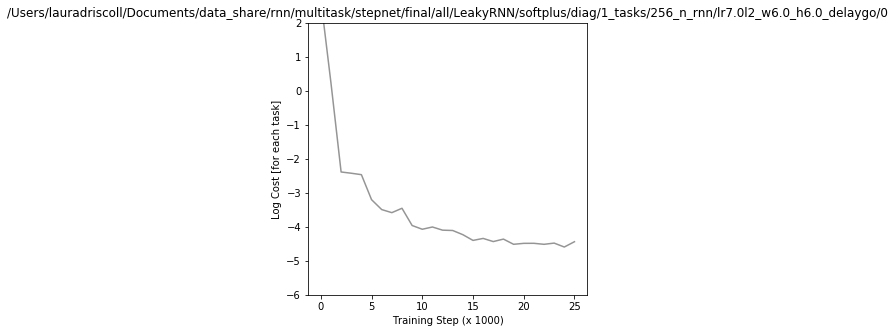

In [4]:
fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
for ri in range(len(rule_trains)):
    r = rule_trains[ri]
    c = cmap((ri+1)/(len(rule_trains)+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+r])
    plt.plot(x,'-',c = c)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')
    plt.ylim([-6,2])
    
plt.title(m)
plt.show()    

In [5]:
#output dynamics
rule = rule_trains[0]
h,trial,tasks = make_h_trial_rule(m)
w_in, b_in, w_out, b_out = get_model_params(m)

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored fr

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data_share/rnn/multitask/stepnet/f

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


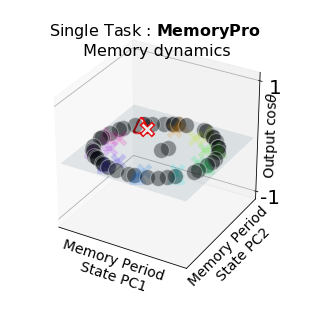

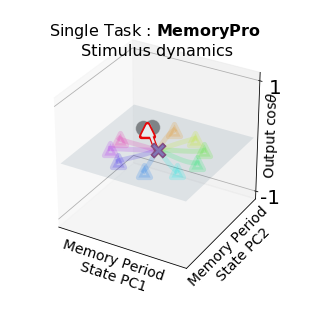

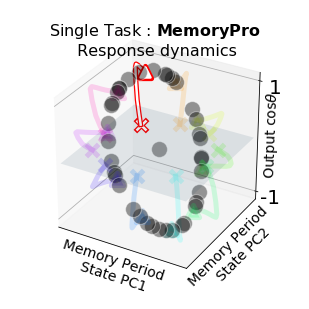

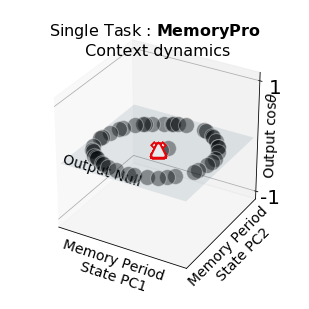

In [6]:
plt.rcParams.update({'font.size': 16})

lim = 1
lil_axes = False
plot_unstable = True
stim_theta = 0 #which fps to plot
rule = rule_trains[0]
fp_file = 'tf_fixed_pts_manytrials'

h,trial,tasks = make_h_trial_rule(m,mode = 'test')
# pca = PCA(n_components = 10)
# x = np.transpose(h[rule],(2,1,0))
# _ = pca.fit_transform(np.reshape(x,(x.shape[0],-1)).T)
# D_use = -pca.components_.T[:,1:]
D_use = make_D_use(m,rule,'delay1',0,'pca_h')
D_use[:,0] = -D_use[:,0]
D_use[:,1] = -D_use[:,1]
D_use[:,2] = w_out[:,2]

for epoch in trial[rule].epochs.keys():
    ax = plot_epoch_dynamics_3D(m,fp_file,epoch,h,trial,rule,D_use,y_set = [stim_theta,],lim = lim,
                                plot_eigenspect = False,lil_axes = lil_axes,fig_scale = 4,plot_title = True,
                                plot_unstable = plot_unstable,ax_labels = ['PC1','PC2','Output '+'$\cos{\theta}$'],
                                q_thresh = -6,fp_size = 250)
    
    ax.set_xlim([-.9,.9])
    ax.set_ylim([-.9,.9])
    [x1,x2] = ax.get_xlim()
    [y1,y2] = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x1, x2, num=2), np.linspace(y1, y2, num=2))
    z = xx*0
    ax.plot_surface(xx, yy, z, alpha=0.1)
    
    
    ax.set_zlim([-1.1,1.1])
    ax.set_zticks([-1,1])
    ax.set_zticklabels([-1,1],fontsize = 20)
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('on')
    ax.grid(True)
    
    ax.set_zlabel('Output '+r'$\cos{\theta}$',labelpad=-10,fontsize = 14)
    if epoch == 'fix1':
        ax.text(x1, y1, 0, 'Output Null', (1,0,0),fontsize = 14)
        
    ax.set_xlabel('Memory Period \n State PC1', labelpad=-5,fontsize = 14)
    ax.set_ylabel('Memory Period \n State PC2', labelpad=-5,fontsize = 14)
    
    ax.dist = 11
    
    
    if lil_axes ==True:
        figname = rule + '_' + epoch +'lil_axes.pdf'
    else:
        figname = rule + '_' + epoch +'.pdf'
        
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))

    plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restorin

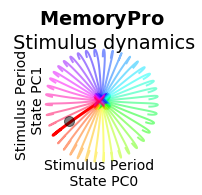

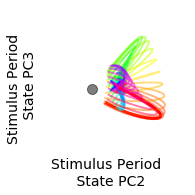

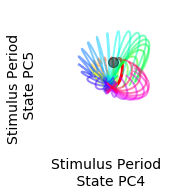

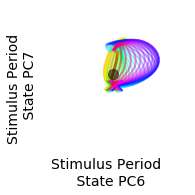

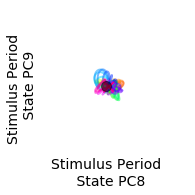

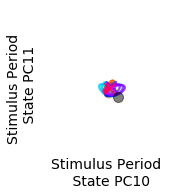

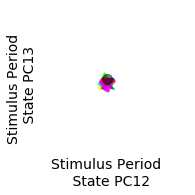

In [7]:
from tools_lnd import plot_epoch_dynamics

epoch = 'stim1'
fp_file = 'tf_fixed_pts_manytrials'
trial = gen_trials_from_model_dir(m,rule,noise_on = False)
filename,_ = get_filename(trial,epoch,0)
f = os.path.join(m,fp_file,rule,filename+'.npz')
D_use = make_FP_axs(f, m, rule, epoch, axs = 'pca_h', clust = 'False',n_components = 20)

plt.rcParams.update({'font.size': 16})

lim = 1
lil_axes = False
plot_unstable = True
stim_theta = 0 #which fps to plot

h,trial,tasks = make_h_trial_rule(m,mode = 'test')

print_title = True
for pcs in range(7):
    ax = plot_epoch_dynamics(m,fp_file,epoch,h,trial,rule,D_use[:,[2*pcs,2*pcs+1]],
                            y_set = [0,],h_epoch = [],plot_eigenspect = False,lim=4, ax_type = 'none',
                            epoch_axes =[],stim_loc_fp = 0,fig_scale = 3, print_title = print_title)
    print_title = False

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    ax.set_xticks([])
    ax.set_yticks([])
#     plt.axis('off')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xlabel('Stimulus Period \n State PC'+str(2*pcs), labelpad=-5,fontsize = 14)
    plt.ylabel('Stimulus Period \n State PC'+str(2*pcs+1), labelpad=-5,fontsize = 14)
    
    figname = rule + '_' + epoch +'PCS'+str(pcs)+'.pdf'
        
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))

    plt.show()